In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
# Define a simple autoencoder class
class AutoencoderNetwork(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoencoderNetwork, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set hyperparameters
input_dim = 784  # For MNIST data, 28x28 images
encoding_dim = 32
batch_size = 64
learning_rate = 1e-3
num_epochs = 10

# Load MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_dataset = torchvision.datasets.MNIST(
    root="../mnist", train=True, download=True, transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize autoencoder model
model = AutoencoderNetwork(input_dim, encoding_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [4]:
# Training loop
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)  # Flatten input images

        # Forward pass
        output = model(img)
        loss = criterion(output, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.9202
Epoch [2/10], Loss: 0.9015
Epoch [3/10], Loss: 0.8936
Epoch [4/10], Loss: 0.8887
Epoch [5/10], Loss: 0.8847
Epoch [6/10], Loss: 0.8928
Epoch [7/10], Loss: 0.8908
Epoch [8/10], Loss: 0.8768
Epoch [9/10], Loss: 0.8688
Epoch [10/10], Loss: 0.8834


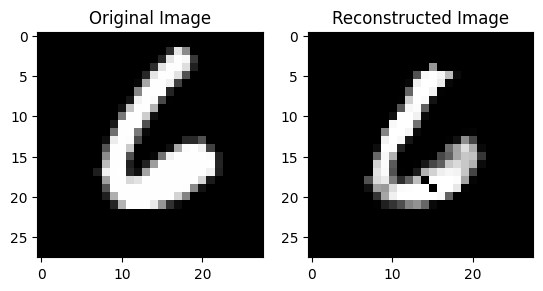

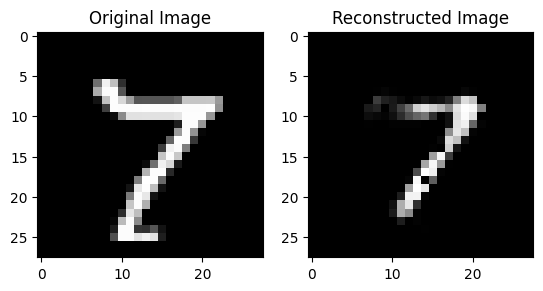

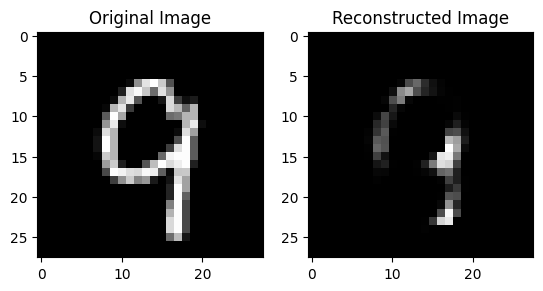

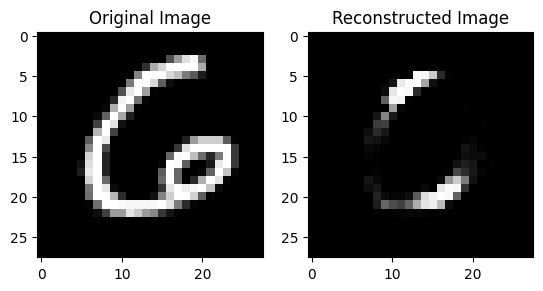

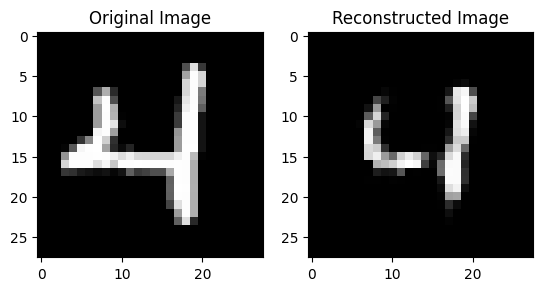

In [5]:
# Test the autoencoder
test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

import matplotlib.pyplot as plt

# Plot some test images and their reconstructions
with torch.no_grad():
    for i, data in enumerate(test_loader):
        img, _ = data
        img = img.view(img.size(0), -1).to(device)
        output = model(img)
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(img.cpu().numpy().reshape(28, 28), cmap="gray")
        plt.title("Original Image")
        plt.subplot(1, 2, 2)
        plt.imshow(output.cpu().numpy().reshape(28, 28), cmap="gray")
        plt.title("Reconstructed Image")
        plt.show()
        if i == 4:  # Plot 5 examples
            break